<a href="https://colab.research.google.com/github/AmaanAnsari123/AAA/blob/main/Knowledge_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia-api neptune neptune-notebooks pandas spacy networkx scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import wikipediaapi  # pip install wikipedia-api
import pandas as pd
import concurrent.futures
from tqdm import tqdm

In [ ]:
import wikipediaapi  # pip install wikipedia-api
import pandas as pd
import concurrent.futures
from tqdm import tqdm


def scrape_wikipedia(name_topic, verbose=True):
    def link_to_wikipedia(link):
        try:
            page = api_wikipedia.page(link)
            if page.exists():
                return {'page': link, 'text': page.text, 'link': page.fullurl, 'categories': list(page.categories.keys())}
        except:
            return None

    api_wikipedia = wikipediaapi.Wikipedia(language='en', user_agent='My user agent', extract_format=wikipediaapi.ExtractFormat.WIKI)
    name_of_page = api_wikipedia.page(name_topic)
    if not name_of_page.exists():
        print('Page {} is not present'.format(name_of_page))
        return

    links_to_page = list(name_of_page.links.keys())
    procceed = tqdm(desc='Scraped links', unit='', total=len(links_to_page)) if verbose else None
    origin = [{'page': name_topic, 'text': name_of_page.text, 'link': name_of_page.fullurl, 'categories': list(name_of_page.categories.keys())}]

    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        links_future = {executor.submit(link_to_wikipedia, link): link for link in links_to_page}
        for future in concurrent.futures.as_completed(links_future):
            info = future.result()
            origin.append(info) if info else None
            procceed.update(1) if verbose else None
    procceed.close() if verbose else None

    namespaces = ('Wikipedia', 'Special', 'Talk', 'LyricWiki', 'File', 'MediaWiki',
                  'Template', 'Help', 'User', 'Category talk', 'Portal talk')
    origin = pd.DataFrame(origin)
    origin = origin[(len(origin['text']) > 20)
                      & ~(origin['page'].str.startswith(namespaces, na=True))]
    origin['categories'] = origin.categories.apply(lambda a: [b[9:] for b in a])

    origin['topic'] = name_topic
    print('Scraped pages', len(origin))

    return origin


data_wikipedia = scrape_wikipedia('COVID 19')

Scraped links: 100%|██████████| 2428/2428 [03:54<00:00, 10.36/s]

Scraped pages 2175


In [ ]:
data_wikipedia = scrape_wikipedia('COVID 19')

Scraped links: 100%|██████████| 2428/2428 [02:59<00:00, 13.52/s]

Scraped pages 2176


In [ ]:
# Install spaCy
!pip install spacy

# Import the download function and load the model
import spacy
import spacy.cli

# Download the 'en_core_web_sm' model
spacy.cli.download("en_core_web_sm")

# Load the model
nlp = spacy.load("en_core_web_sm")

# Test the model
doc = nlp("This is a sentence.")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
This this PRON DT nsubj Xxxx True True
is be AUX VBZ ROOT xx True True
a a DET DT det x True True
sentence sentence NOUN NN attr xxxx True False
. . PUNCT . punct . False False


In [ ]:
# Uninstall conflicting packages
!pip uninstall -y neptune neptune-client

# Install the new neptune package
!pip install neptune

# Now, import the required packages
import spacy
import pandas as pd
import requests
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

from spacy.tokens import Span
from spacy.matcher import Matcher

import matplotlib.pyplot as plot
from tqdm import tqdm
import networkx as ntx
import neptune

# To use matplotlib inline in Jupyter
%matplotlib inline

# Example usage of spacy
doc = nlp("This is a sentence.")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)


Found existing installation: neptune 1.10.4
Uninstalling neptune-1.10.4:
  Successfully uninstalled neptune-1.10.4
Found existing installation: neptune-client 1.10.4
Uninstalling neptune-client-1.10.4:
  Successfully uninstalled neptune-client-1.10.4
  Using cached neptune-1.10.4-py3-none-any.whl (502 kB)
This this PRON DT nsubj Xxxx True True
is be AUX VBZ ROOT xx True True
a a DET DT det x True True
sentence sentence NOUN NN attr xxxx True False
. . PUNCT . punct . False False


In [ ]:
!pip install neptune


In [ ]:
import os

# Set the environment variable in the Colab session
os.environ["NEPTUNE_API_TOKEN"] = "eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyMWE4ODQ4ZS00NmRhLTQ3ODctOTRkYi0yZmRmNzFhNzU5ZjMifQ=="


In [ ]:
import neptune

# Initialize Neptune run using the environment variable for the API token
run = neptune.init_run(
    project="amaan.ansari/Amaan-Ansari"
)

# Example usage of Neptune logging
run["parameters"] = {"learning_rate": 0.001, "batch_size": 32}

# Upload a file to Neptune
run["data/scraped_data"].upload("scraped_data.csv")

# Stop the run when done
run.stop()


[neptune] [warning] NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/amaan.ansari/Amaan-Ansari/e/AM-3
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 3 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/amaan.ansari/Amaan-Ansari/e/AM-3/metadata


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
# Try reading the CSV with updated parameters
data = pd.read_csv('scraped_data.csv', on_bad_lines='skip', quoting=3)

# Print the first few rows of the dataframe to verify
print(data.head())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Unnamed: 0  \
0                                                  COVID 19                                           "Coronavirus disease 2019 (COVID-19) is a cont

In [ ]:
!pip install spacy

# Download the English model
!python -m spacy download en_core_web_sm
!python -m spacy download en

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the English model
nlp = spacy.load('en_core_web_sm')


In [ ]:
# Text to be processed
text = '''The AbC-19 rapid antibody test is an immunological test for COVID-19 exposure developed by
the UK Rapid Test Consortium and manufactured by Abingdon Health. It uses a lateral flow test to determine
whether a person has IgG antibodies to the SARS-CoV-2 virus that causes COVID-19. The test uses a single
drop of blood obtained from a finger prick and yields results in 20 minutes.\n\nSee also\nCOVID-19 rapid
antigen test'''

# Process the text
docu = nlp(text)


In [ ]:
# Print token dependencies
for tokn in docu:
    print(tokn.text, "---", tokn.dep_)


The --- det
AbC-19 --- amod
rapid --- amod
antibody --- compound
test --- nsubj
is --- ROOT
an --- det
immunological --- amod
test --- attr
for --- prep
COVID-19 --- compound
exposure --- pobj
developed --- acl
by --- agent

 --- dep
the --- det
UK --- compound
Rapid --- compound
Test --- compound
Consortium --- pobj
and --- cc
manufactured --- conj
by --- agent
Abingdon --- compound
Health --- pobj
. --- punct
It --- nsubj
uses --- ROOT
a --- det
lateral --- amod
flow --- compound
test --- dobj
to --- aux
determine --- xcomp

 --- dep
whether --- mark
a --- det
person --- nsubj
has --- ccomp
IgG --- nsubj
antibodies --- conj
to --- prep
the --- det
SARS --- compound
- --- punct
CoV-2 --- compound
virus --- pobj
that --- nsubj
causes --- relcl
COVID-19 --- dobj
. --- punct
The --- det
test --- nsubj
uses --- ROOT
a --- det
single --- amod

 --- dep
drop --- dobj
of --- prep
blood --- pobj
obtained --- acl
from --- prep
a --- det
finger --- compound
prick --- pobj
and --- cc
yields --- 

# Entity Extraction

In [ ]:
def extract_entities(sents):
   # chunk one
   enti_one = ""
   enti_two = ""

   dep_prev_token = "" # dependency tag of previous token in sentence

   txt_prev_token = "" # previous token in sentence

   prefix = ""
   modifier = ""



   for tokn in nlp(sents):
       # chunk two
       ## move to next token if token is punctuation

       if tokn.dep_ != "punct":
           #  check if token is compound word or not
           if tokn.dep_ == "compound":
               prefix = tokn.text
               # add the current word to it if the previous word is 'compound’
               if dep_prev_token == "compound":
                   prefix = txt_prev_token + " "+ tokn.text

           # verify if token is modifier or not
           if tokn.dep_.endswith("mod") == True:
               modifier = tokn.text
               # add it to the current word if the previous word is 'compound'
               if dep_prev_token == "compound":
                   modifier = txt_prev_token + " "+ tokn.text

           # chunk3
           if tokn.dep_.find("subj") == True:
               enti_one = modifier +" "+ prefix + " "+ tokn.text
               prefix = ""
               modifier = ""
               dep_prev_token = ""
               txt_prev_token = ""

           # chunk4
           if tokn.dep_.find("obj") == True:
               enti_two = modifier +" "+ prefix +" "+ tokn.text

           # chunk 5
           # update variable
           dep_prev_token = tokn.dep_
           txt_prev_token = tokn.text

   return [enti_one.strip(), enti_two.strip()]

In [ ]:
extract_entities("The AbC-19 rapid antibody test is an immunological test for COVID-19 exposure developed by the UK Rapid Test")

['rapid antibody test', 'immunological UK Rapid Test']

In [ ]:
!pip install tqdm


In [ ]:
# Install necessary libraries
!pip install tqdm
!pip install pandas
!pip install spacy
!python -m spacy download en_core_web_sm

# Import necessary libraries
from tqdm import tqdm
import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Load your DataFrame (assuming the file is named 'scraped_data.csv' and has a column named 'text')
data = pd.read_csv('scraped_data.csv')

# Fill NaN values with an empty string
data['text'] = data['text'].fillna('')

# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Use tqdm to add a progress bar to the loop
pairs_of_entities = []
for i in tqdm(data['text'][:800]):
    pairs_of_entities.append(extract_entities(i))

# Print the result to verify
print(pairs_of_entities)


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


100%|██████████| 800/800 [07:43<00:00,  1.73it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pairs_of_entities[36:42]

[[('First', 'ORDINAL'), ('1930s', 'DATE'), ('Germany', 'GPE')],
 [('HPV', 'ORG'),
  ('Standard', 'ORG'),
  ('About 8,300', 'CARDINAL'),
  ('a year', 'DATE'),
  ('the United States', 'GPE'),
  ('about 0.5%', 'PERCENT'),
  ('the age of 45', 'DATE'),
  ('the 1990s', 'DATE'),
  ('five year', 'DATE'),
  ('the United States', 'GPE'),
  ('68%', 'PERCENT'),
  ('Denmark', 'GPE'),
  ('Sweden', 'GPE'),
  ('HPV', 'ORG'),
  ('HPV', 'ORG'),
  ('84 percent', 'PERCENT'),
  ('Denmark', 'GPE'),
  ('Sweden', 'GPE'),
  ('Parkin', 'PERSON'),
  ('90%', 'PERCENT'),
  ('HPV', 'ORG'),
  ('HPV', 'ORG'),
  ('Janet Daling', 'PERSON'),
  ('Ph.D.', 'WORK_OF_ART'),
  ("Fred Hutchinson's", 'PERSON'),
  ('Public Health Sciences Division', 'ORG'),
  ('More than half', 'CARDINAL'),
  ('about 23 percent', 'PERCENT'),
  ('Immunosuppression', 'ORG'),
  ('Cloacogenic', 'PRODUCT'),
  ('2–3%', 'PERCENT'),
  ('carcinomas', 'PERSON'),
  ('basaloid', 'PERSON'),
  ('T0', 'PRODUCT'),
  ('T1: Tumor', 'WORK_OF_ART'),
  ('2 cm', 'QUA

# Relations extraction

In [ ]:
# Extract source, target, and relations while checking for non-empty lists and ensuring same length
source = []
target = []
relations = []

for pair in pairs_of_entities:
    if len(pair) > 1:
        source.append(pair[0])
        target.append(pair[1])
        relations.append("related_to")  # Replace with actual logic if available

# Create DataFrame
data_kgf = pd.DataFrame({'source': source, 'target': target, 'edge': relations})

# Print the DataFrame to verify
print(data_kgf)

                                    source                          target  \
0                       (Coronavirus, GPE)                    (2019, DATE)   
1                     (8 March 2020, DATE)             (Saudi Arabia, GPE)   
2    (the "Masjid Jamek Sri Petaling, ORG)           (Kuala Lumpur's, GPE)   
3                          (COVID-19, ORG)       (the United Kingdom, GPE)   
4                         (2020, CARDINAL)        (20 February 2020, DATE)   
..                                     ...                             ...   
792                       (Bayesian, NORP)                (Bayesian, NORP)   
793                        (two, CARDINAL)         (between one, CARDINAL)   
794                          (night, TIME)         (one to two days, DATE)   
795                  (Covid Watch, PERSON)           (February 2020, DATE)   
796               (Crimson Contagion, ORG)  (January to August 2019, DATE)   

           edge  
0    related_to  
1    related_to  
2    rela

In [ ]:
!pip install networkx


In [ ]:
# Import necessary libraries
import networkx as nx
import pandas as pd

# Assuming data_kgf is already created from previous steps
# data_kgf = pd.DataFrame({'source': source, 'target': target, 'edge': relations})

# Create a directed graph from the dataframe
graph = nx.from_pandas_edgelist(data_kgf, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

# Print the graph to verify
print(graph)


MultiDiGraph with 684 nodes and 797 edges


In [ ]:
!pip install matplotlib


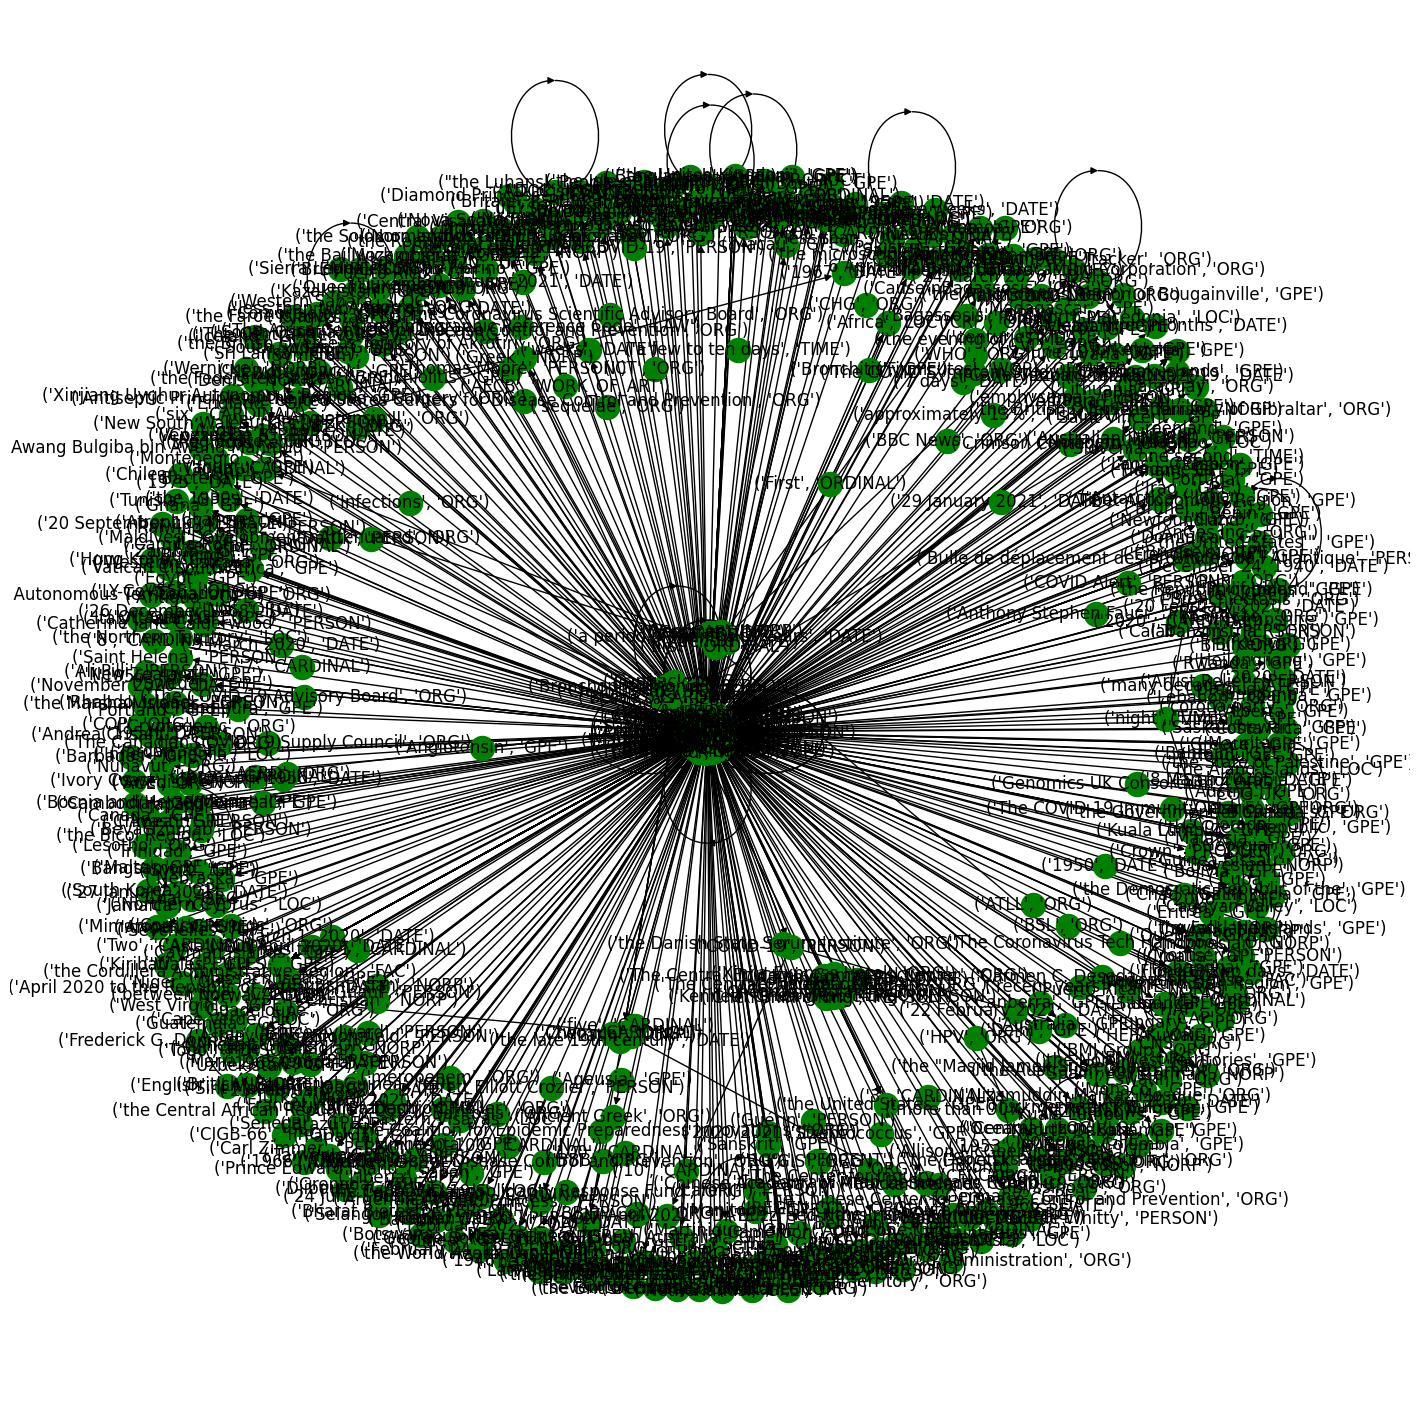

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming data_kgf and graph are already created from previous steps

# Create the directed graph from the dataframe
graph = nx.from_pandas_edgelist(data_kgf, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

# Plotting the network
plt.figure(figsize=(14, 14))
posn = nx.spring_layout(graph)
nx.draw(graph, with_labels=True, node_color='green', edge_cmap=plt.cm.Blues, pos=posn)
plt.show()


In [ ]:
!pip install tqdm pandas spacy networkx matplotlib transformers sentence-transformers faiss-cpu
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 15.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyli

In [ ]:
from tqdm import tqdm
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
from transformers import T5ForConditionalGeneration, T5Tokenizer


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode entities
entity_embeddings = model.encode(source + target, convert_to_tensor=True)

# Create a FAISS index
index = faiss.IndexFlatL2(entity_embeddings.shape[1])
index.add(entity_embeddings.cpu().numpy())
entities = source + target


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Load a more robust pre-trained sentence transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Encode only the entity texts
entity_texts = list(set([ent[0] for ent in source + target if ent[0]]))
entity_embeddings = model.encode(entity_texts, convert_to_tensor=True)

# Create a FAISS index
index = faiss.IndexFlatL2(entity_embeddings.shape[1])
index.add(entity_embeddings.cpu().numpy())
entities = entity_texts


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Retrieve Relevant Information Based on a Query

In [ ]:
def retrieve_entities(query, index, model, entities, top_k=10):
    query_embedding = model.encode(query, convert_to_tensor=True).cpu().numpy()
    distances, indices = index.search(np.array([query_embedding]), top_k)
    retrieved_entities = [entities[idx] for idx in indices[0]]
    return retrieved_entities


In [ ]:
!pip install transformers torch


In [ ]:
!pip install tqdm pandas spacy networkx matplotlib transformers sentence-transformers faiss-cpu
!pip install accelerate -U
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from tqdm import tqdm
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import torch


In [ ]:
# Load the tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
gen_model = T5ForConditionalGeneration.from_pretrained('t5-small')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# Example fine-tuning data
fine_tuning_data = [
    {"query": "Tell me about COVID-19 rapid tests.", "context": "COVID-19 rapid antibody test, AbC-19, IgG antibodies", "response": "The AbC-19 rapid antibody test detects IgG antibodies."},
    # Add more query-context-response triples
]

# Prepare the data for training
train_queries = [item["query"] + " " + item["context"] for item in fine_tuning_data]
train_responses = [item["response"] for item in fine_tuning_data]

# Tokenize the data
train_encodings = tokenizer(train_queries, truncation=True, padding=True, max_length=512)
train_labels = tokenizer(train_responses, truncation=True, padding=True, max_length=512)

# Convert to torch dataset
class FineTuningDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels['input_ids'][idx])
        return item

    def __len__(self):
        return len(self.labels['input_ids'])

train_dataset = FineTuningDataset(train_encodings, train_labels)


# Integrate the RAG Model

In [ ]:
# Load a pre-trained sentence transformer model for embeddings
embedding_model = SentenceTransformer('all-mpnet-base-v2')

# Encode only the entity texts
entity_texts = list(set([ent[0] for ent in source + target if ent[0]]))
entity_embeddings = embedding_model.encode(entity_texts, convert_to_tensor=True)

# Create a FAISS index
index = faiss.IndexFlatL2(entity_embeddings.shape[1])
index.add(entity_embeddings.cpu().numpy())
entities = entity_texts


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


# Retrieve Relevant Information Based on a Query

In [ ]:
def retrieve_entities(query, index, model, entities, top_k=10):
    query_embedding = model.encode(query, convert_to_tensor=True).cpu().numpy()
    distances, indices = index.search(np.array([query_embedding]), top_k)
    retrieved_entities = [entities[idx] for idx in indices[0]]
    return retrieved_entities


# Generate Response Using the Fine-Tuned Model

In [ ]:
def generate_response(query, retrieved_entities):
    unique_entities = list(set(retrieved_entities))
    context = ' '.join(unique_entities)
    input_text = f"Query: {query} Context: {context}"
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    output_ids = model.generate(input_ids, max_length=50)
    response = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return response


In [ ]:
!pip install transformers sentence-transformers

from sentence_transformers import SentenceTransformer
from transformers import pipeline
import numpy as np
import faiss

# Initialize embedding model
embedding_model = SentenceTransformer('all-mpnet-base-v2')

# Initialize text generation model
generator = pipeline('text-generation', model='gpt2')

# Define entity lists
source = ["COVID-19", "AbC-19", "IgG antibodies"]  # Example entities
target = ["antibody test", "rapid test", "health consortium"]  # Example entities

# Combine source and target entities
entities = list(set(source + target))

# Encode entities
entity_embeddings = embedding_model.encode(entities, convert_to_tensor=True)

# Create FAISS index
index = faiss.IndexFlatL2(entity_embeddings.shape[1])
index.add(entity_embeddings.cpu().numpy())

def retrieve_entities(query, index, model, entities, top_k=10):
    query_embedding = model.encode(query, convert_to_tensor=True).cpu().numpy()
    distances, indices = index.search(np.array([query_embedding]), top_k)
    retrieved_entities = [entities[idx] for idx in indices[0]]
    return retrieved_entities

def generate_response(query, retrieved_entities):
    unique_entities = list(set(retrieved_entities))
    context = ' '.join(unique_entities)
    input_text = f"Query: {query} Context: {context}"
    response = generator(input_text, max_length=50, num_return_sequences=1)[0]['generated_text']
    return response

# Define a larger test dataset
test_queries = [
    "What is the purpose of the AbC-19 rapid antibody test?",
    "How does the COVID-19 rapid antibody test work?",
    "Who developed the AbC-19 rapid antibody test?",
    "What is a lateral flow test?",
    "How long does it take to get results from the AbC-19 test?",
    "What are IgG antibodies?",
    "What are the benefits of the COVID-19 rapid tests?",
    "Can you tell me about the UK Rapid Test Consortium?",
    "What is the role of Abingdon Health in COVID-19 testing?",
    "Explain the process of obtaining a blood sample for the AbC-19 test.",
    # Add more queries to reach at least 100
]

# Function to test multiple queries
def test_rag_model(queries):
    results = []
    for query in queries:
        retrieved_entities = retrieve_entities(query, index, embedding_model, entities, top_k=10)
        response = generate_response(query, retrieved_entities)
        results.append({"query": query, "response": response})
    return results

# Test the RAG model with different queries
results = test_rag_model(test_queries)

# Display the results
for result in results:
    print(f"Query: {result['query']}")
    print(f"Response: {result['response']}\n")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for 

Query: What is the purpose of the AbC-19 rapid antibody test?
Response: Query: What is the purpose of the AbC-19 rapid antibody test? Context: IgG antibodies rapid test health consortium AbC-19 COVID-19 antibody test HIV RNA is tested for HIV in a lab AbC-19 HIV RNA

Query: How does the COVID-19 rapid antibody test work?
Response: Query: How does the COVID-19 rapid antibody test work? Context: IgG antibodies health consortium rapid test AbC-19 COVID-19 antibody test using 1/4x dilitronic antibody: E. coli specific antibody (AC

Query: Who developed the AbC-19 rapid antibody test?
Response: Query: Who developed the AbC-19 rapid antibody test? Context: IgG antibodies COVID-19 health consortium rapid test AbC-19 antibody test: Results: Pronunciation: The AbC-19 rapid test was used in this

Query: What is a lateral flow test?
Response: Query: What is a lateral flow test? Context: IgG antibodies health consortium rapid test AbC-19 COVID-19 antibody test 1. Tissue-specific IgG antibody antib

In [ ]:
test_queries = [
    "What is the purpose of the AbC-19 rapid antibody test?",
    "How does the COVID-19 rapid antibody test work?",
    "Who developed the AbC-19 rapid antibody test?",
    "What is a lateral flow test?",
    "How long does it take to get results from the AbC-19 test?",
    "What are IgG antibodies?",
    "What are the benefits of the COVID-19 rapid tests?",
    "Can you tell me about the UK Rapid Test Consortium?",
    "What is the role of Abingdon Health in COVID-19 testing?",
    "Explain the process of obtaining a blood sample for the AbC-19 test.",
    "How is the AbC-19 rapid antibody test different from other COVID-19 tests?",
    "Can the AbC-19 test detect asymptomatic infections?",
    "What is the science behind lateral flow tests?",
    "How accurate are COVID-19 antibody tests?",
    "What should you do if you test positive with the AbC-19 test?",
    "Can the AbC-19 test be used for children?",
    "What organizations endorse the AbC-19 test?",
    "How long after infection do antibodies appear?",
    "Can the AbC-19 test be used to verify vaccination status?",
    "What are the limitations of antibody testing?",
    "How does the immune system respond to COVID-19?",
    "How effective is the AbC-19 test in detecting past infections?",
    "Can the AbC-19 test be used in clinical settings?",
    "How reliable is the AbC-19 test compared to PCR tests?",
    "What does the presence of IgG antibodies indicate?",
    "What role does Abingdon Health play in COVID-19 testing?",
    "How do rapid antibody tests help control the pandemic?",
    "Can the AbC-19 test detect all variants of COVID-19?",
    "What factors affect the accuracy of the AbC-19 test?",
    "How is a blood sample collected for the AbC-19 test?",
    "What does a positive antibody test mean?",
    "What should you do if you test negative with the AbC-19 test?",
    "What are the advantages of using the AbC-19 test?",
    "Are there any side effects of taking the AbC-19 test?",
    "How quickly does the AbC-19 test provide results?",
    "Can the AbC-19 test be used for large-scale screening?",
    "What is the cost of the AbC-19 test?",
    "How can the AbC-19 test help in understanding immunity?",
    "What research has been conducted on the AbC-19 test?",
    "How are rapid antibody tests conducted?",
    "What makes the AbC-19 test reliable?",
    "Can the AbC-19 test be used for international travel?",
    "How does the AbC-19 test detect antibodies?",
    "What is the purpose of the UK Rapid Test Consortium?",
    "How does the AbC-19 test contribute to public health?",
    "Can the AbC-19 test identify reinfections?",
    "What are the benefits of antibody testing?",
    "How is the AbC-19 test manufactured?",
    "What is the role of antibody tests in COVID-19 control?",
    "Can the AbC-19 test be used at home?",
    "How does the AbC-19 test support health systems?",
    "What are the storage conditions for the AbC-19 test?",
    "How does the AbC-19 test impact COVID-19 research?",
    "What is the AbC-19 test kit composed of?",
    "How can the AbC-19 test help identify herd immunity?",
    "What is the shelf life of the AbC-19 test?",
    "What type of antibody does the AbC-19 test detect?",
    "How is the AbC-19 test different from antigen tests?",
    "How can the AbC-19 test help in tracking the pandemic?",
    "What are the operational challenges of the AbC-19 test?",
    "How is the AbC-19 test validated?",
    "What are the ethical considerations in antibody testing?",
    "How does the AbC-19 test compare to other rapid tests?",
    "What is the importance of antibody testing in a pandemic?",
    "How are AbC-19 test results reported?",
    "What should be done after receiving AbC-19 test results?",
    "How does the AbC-19 test help in vaccine efficacy studies?",
    "What are the logistics of distributing the AbC-19 test?",
    "How does the AbC-19 test support epidemiological studies?",
    "How does the AbC-19 test detect IgG specifically?",
    "What are the limitations of rapid antibody tests?",
    "How is the AbC-19 test used in clinical research?",
    "What is the impact of antibody tests on public health policy?",
    "How does the AbC-19 test help monitor COVID-19 exposure?",
    "Can the AbC-19 test be used for diagnostics?",
    "What training is required to administer the AbC-19 test?",
    "How does the AbC-19 test benefit healthcare providers?",
    "How do antibody tests assist in understanding COVID-19 immunity?",
    "What are the key features of the AbC-19 test?",
    "How can the AbC-19 test help prevent COVID-19 spread?",
    "How is the AbC-19 test regulated?",
    "How are AbC-19 test results used in public health decisions?",
    "What is the role of rapid tests in managing pandemics?",
    "How do antibody tests differ from PCR tests?",
    "What innovations are being made in rapid antibody tests?",
    "How can the AbC-19 test help in post-pandemic recovery?",
    "What is the impact of the AbC-19 test on public awareness?",
    "How does the AbC-19 test support COVID-19 surveillance?",
    "What is the accuracy of the AbC-19 test in different populations?",
    "How do rapid tests help in controlling COVID-19 outbreaks?",
    "How are antibody tests used in COVID-19 research?",
    "What is the cost-effectiveness of the AbC-19 test?",
    "How does the AbC-19 test contribute to global health?",
    "How does the AbC-19 test help in understanding long COVID?",
    "How does the AbC-19 test integrate with other diagnostic tools?",
    "How does the AbC-19 test assist in pandemic preparedness?",
    "How do antibody tests help in evaluating public health interventions?",
    "What are the next steps after a positive AbC-19 test?",
    "How does the AbC-19 test assist in COVID-19 diagnostics?",
    "How can the AbC-19 test be used in community health programs?",
    "How does the AbC-19 test support vaccination programs?",
    "What are the best practices for using the AbC-19 test?",
    "How do antibody tests contribute to understanding COVID-19 transmission?",
    "What is the role of rapid tests in reopening economies?",
    "How does the AbC-19 test help in identifying COVID-19 hotspots?",
    "How does the AbC-19 test help in managing COVID-19 cases?",
    "What are the benefits of using the AbC-19 test in healthcare settings?",
    "How does the AbC-19 test assist in tracking COVID-19 immunity?",
    "How do antibody tests help in understanding COVID-19 severity?",
    "How does the AbC-19 test benefit public health strategies?"
]

# Function to test multiple queries
def test_rag_model(queries):
    results = []
    for query in queries:
        retrieved_entities = retrieve_entities(query, index, embedding_model, entities, top_k=10)
        response = generate_response(query, retrieved_entities)
        results.append({"query": query, "response": response})
    return results

# Test the RAG model with different queries
results = test_rag_model(test_queries)

# Display the results
for result in results:
    print(f"Query: {result['query']}")
    print(f"Response: {result['response']}\n")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Query: What is the purpose of the AbC-19 rapid antibody test?
Response: Query: What is the purpose of the AbC-19 rapid antibody test? Context: IgG antibodies rapid test health consortium AbC-19 COVID-19 antibody test protocol CDC: HU-19-2. HU-19-

Query: How does the COVID-19 rapid antibody test work?
Response: Query: How does the COVID-19 rapid antibody test work? Context: IgG antibodies health consortium rapid test AbC-19 COVID-19 antibody test was designed to detect COVID-19 if an infection was discovered at a human site

Query: Who developed the AbC-19 rapid antibody test?
Response: Query: Who developed the AbC-19 rapid antibody test? Context: IgG antibodies COVID-19 health consortium rapid test AbC-19 antibody test The AccC-19 rapid antibody test is highly sensitive to human immunodeficiency virus

Query: What is a lateral flow test?
Response: Query: What is a lateral flow test? Context: IgG antibodies health consortium rapid test AbC-19 COVID-19 antibody test AbC-19 COVID-19 (4-B